<a href="https://colab.research.google.com/github/peterdelaguila/peterdelaguila.github.io/blob/master/Cars_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:

data_inicial = pd.read_csv("cars.csv")
data_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           256 non-null    float64
 1    cylinders    256 non-null    int64  
 2    cubicinches  256 non-null    int64  
 3    hp           256 non-null    int64  
 4    weightlbs    256 non-null    int64  
 5    time-to-60   256 non-null    int64  
 6    year         256 non-null    int64  
 7    brand        256 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.1+ KB


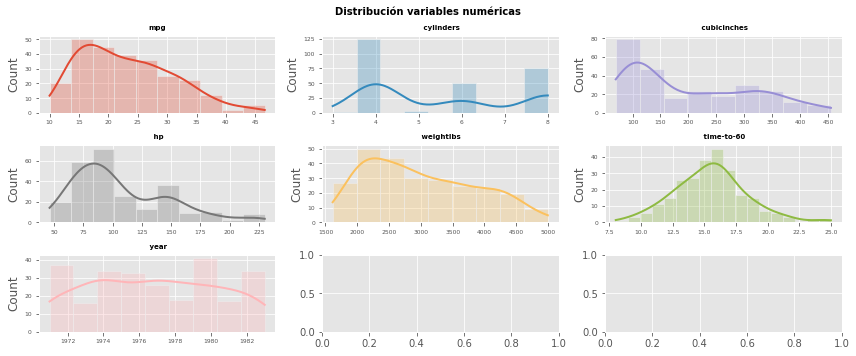

In [3]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_numeric = data_inicial.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data_inicial,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [6]:
# Correlación entre columnas numéricas
# ==============================================================================
data_final = data_inicial
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = data_final.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
15,cubicinches,cylinders,0.951529,0.951529
9,cylinders,cubicinches,0.951529,0.951529
18,cubicinches,weightlbs,0.930027,0.930027
30,weightlbs,cubicinches,0.930027,0.930027
23,hp,cubicinches,0.907341,0.907341
17,cubicinches,hp,0.907341,0.907341
11,cylinders,weightlbs,0.897247,0.897247
29,weightlbs,cylinders,0.897247,0.897247
25,hp,weightlbs,0.863467,0.863467
31,weightlbs,hp,0.863467,0.863467


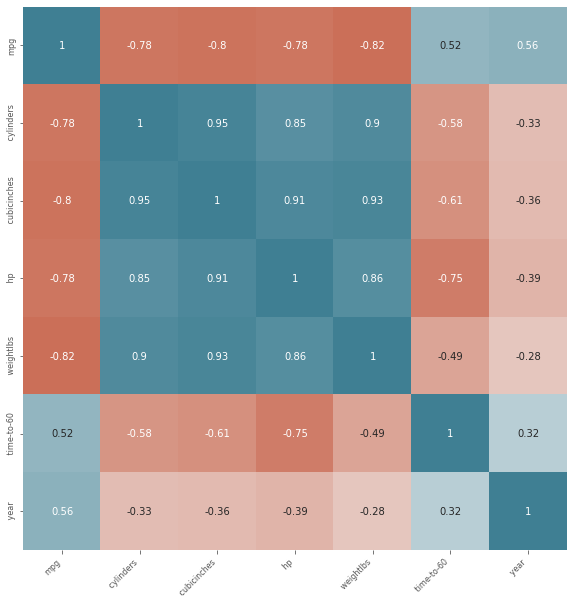

In [7]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)